  # **SMS-Spam-detection Project**

____




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SMS_SpamColab/SMS Spam Dataset.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4753,ham,Ok lor... Or u wan me go look 4 u?,NaN,NaN,NaN
630,ham,Please dont say like that. Hi hi hi,NaN,NaN,NaN
3428,ham,I don't know jack shit about anything or i'd s...,NaN,NaN,NaN
4567,ham,hiya hows it going in sunny africa? hope u r a...,NaN,NaN,NaN
3127,ham,would u fuckin believe it they didnt know i ha...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

* 1. **Data cleaning**
* 2. **EDA**
* 3. **Text Preprocessing**
* 4. **Model bulding**
* 5. **Evaluation**
* 6. **Website**
* 7. **Deploy**

# 1. Data Cleaning

In [ ]:
# Datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis='1', inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Rename the column name

df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Statistical info

df.describe()

,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# Checking missing value
df.isnull().sum()

,0
Target,0
Text,0


In [ ]:
df.nunique()

,0
Target,2
Text,5169


In [ ]:
# Checking Duplicat value

df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])     # 0=ham , 1=spam
df.head()


,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2. EDA

In [ ]:
df['Target'].value_counts()

,count
Target,
0,4516
1,653


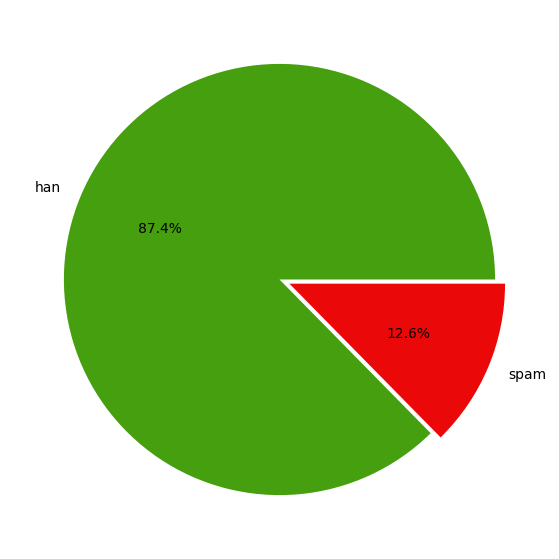

In [ ]:
plt.figure(figsize=(9,7))
plt.pie(df['Target'].value_counts(), labels=['han','spam'], autopct="%1.1f%%", colors=["#469F0F","#EB0808"], explode=(0,0.05))

plt.show()

or

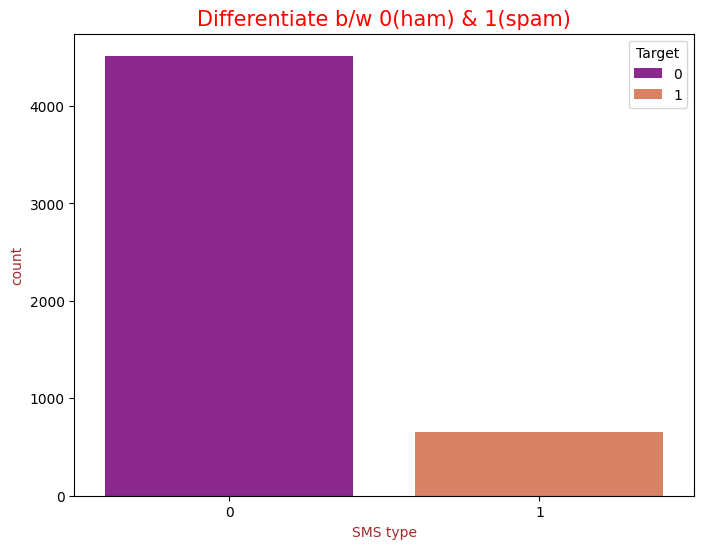

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(x='Target', data=df, hue='Target', palette='plasma')

plt.title('Differentiate b/w 0(ham) & 1(spam)', color ='r', size=15)
plt.xlabel('SMS type', c='brown')
plt.ylabel('count', c='brown')
plt.show()

In [ ]:
#NLP
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words'] = df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(7)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2


In [ ]:
df.dtypes

,0
Target,int64
Text,object
num_characters,int64
num_words,int64
num_sentences,int64


In [ ]:
# Statistical info
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
df.groupby('Target')[['num_characters','num_words','num_sentences']].mean()

,num_characters,num_words,num_sentences
Target,,,
0,70.459256,17.123782,1.820195
1,137.891271,27.667688,2.970904


In [ ]:
sns.set(style='whitegrid')

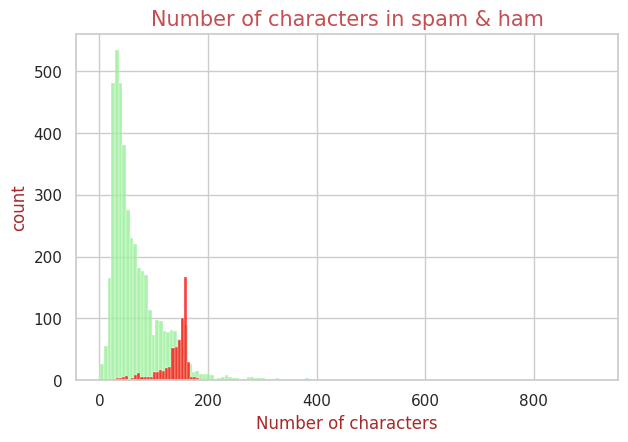

In [ ]:
#Visualization of ham(0) & spam(1) in Number of characters
plt.figure(figsize=(7,4.5))
sns.histplot(df[df['Target']==0]['num_characters'], color='lightgreen')  #ham
sns.histplot(df[df['Target']==1]['num_characters'], color='red')         #spam

plt.title("Number of characters in spam & ham", c='r', size=15)
plt.xlabel('Number of characters', c='brown')#Visualization of ham(0) & spam(1) in Number of characters
plt.ylabel('count', c='brown')
plt.show()

*Conclusion* - The Number of characters is more in **spam(1)** SMS

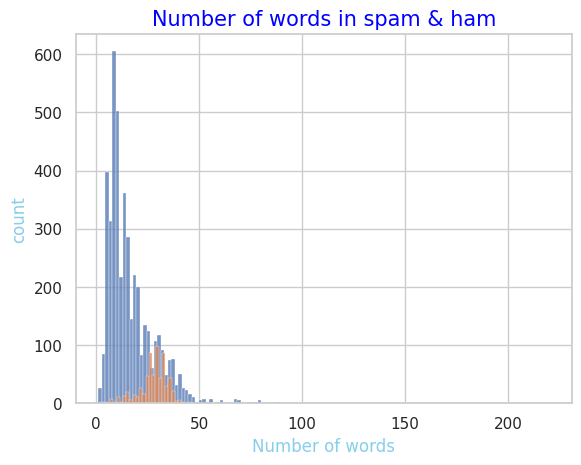

In [ ]:
#Visualization of ham(0) & spam(1) in Number of words

sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'])

plt.title("Number of words in spam & ham", c='blue', size=15)
plt.xlabel('Number of words', c='skyblue')#Visualization of ham(0) & spam(1) in Number of words
plt.ylabel('count', c='skyblue')
plt.show()

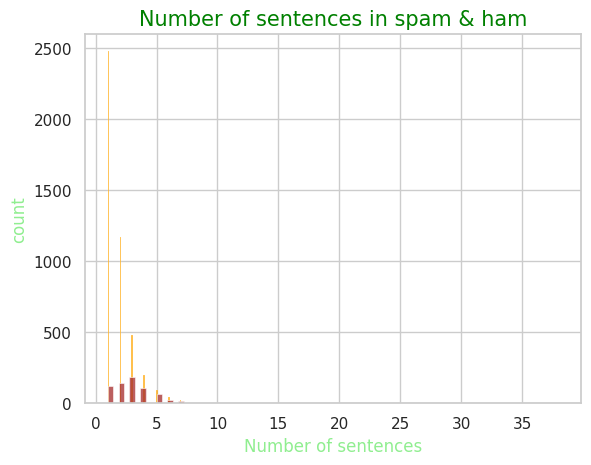

In [ ]:
#Visualization of ham(0) & spam(1) in Number of sentences

sns.histplot(df[df['Target']==0]['num_sentences'],color='orange')
sns.histplot(df[df['Target']==1]['num_sentences'],color='brown')

plt.title("Number of sentences in spam & ham", c='green', size=15)
plt.xlabel('Number of sentences', c='lightgreen')#Visualization of ham(0) & spam(1) in Number of sentences
plt.ylabel('count', c='lightgreen')
plt.grid(True)
plt.show()

In [ ]:
# Checking the Correlation

Corr_Matrix = df.corr(numeric_only=True)
Corr_Matrix

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

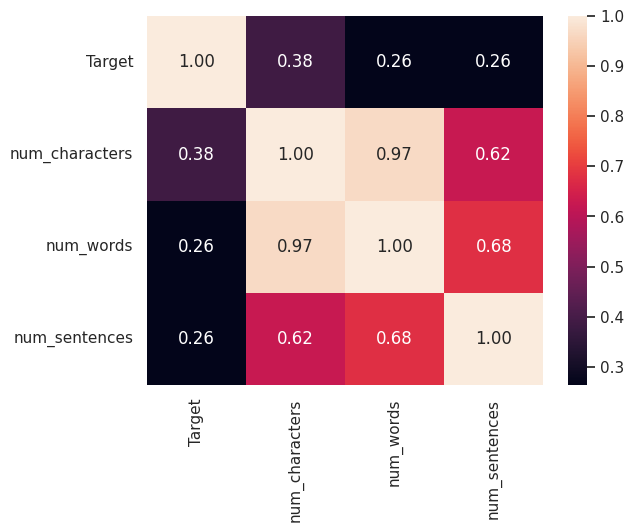

In [ ]:
# Plot heatmap

sns.heatmap(Corr_Matrix, annot=True, fmt='.2f')

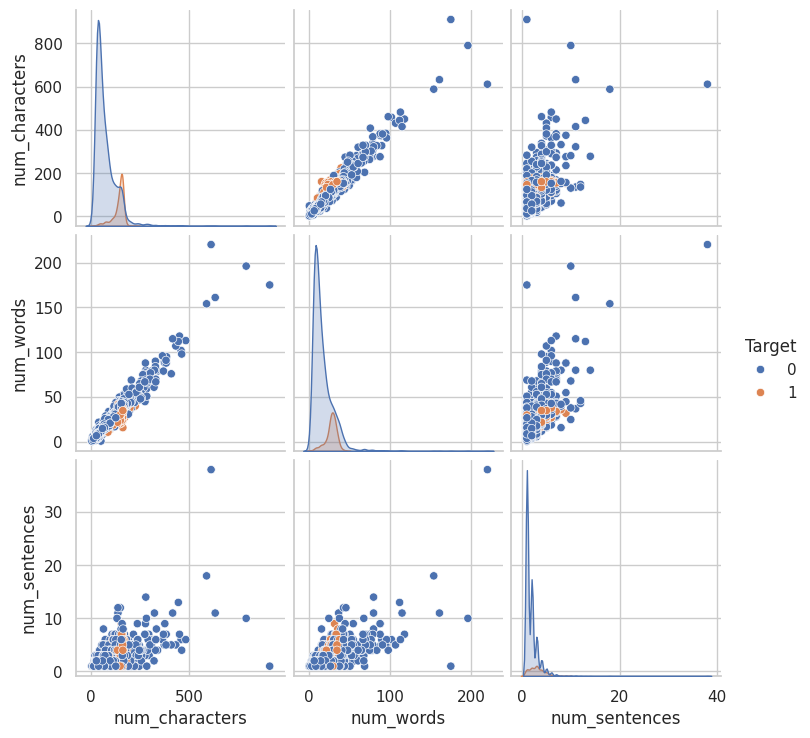

In [ ]:
sns.pairplot(df, hue='Target')
plt.show()

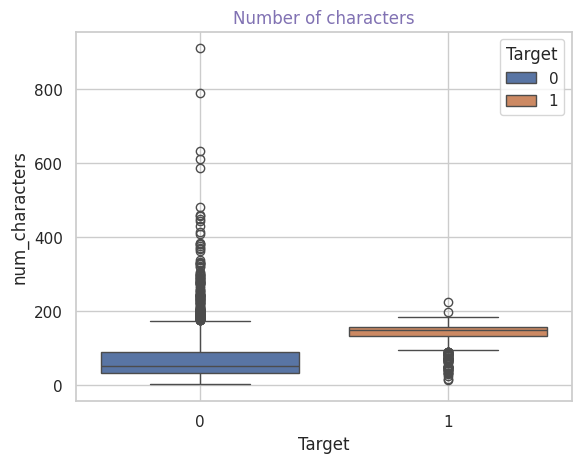

In [ ]:
sns.boxplot(x='Target',y='num_characters', data=df, hue='Target')

plt.title("Number of characters",c='m')
plt.grid(True)
plt.show()

# 3. Text Preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and production
* Stemming

In [ ]:
from nltk.corpus import stopwords     #Ese run karva ke comment kar denge 291 & 292 line ko
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("I am doing a Dancing with & Singing  I an doing ")

'i am doing a dancing with & singing  i an doing '

In [ ]:
# Data Preprocessing
def text_transform(x):
  x = x.lower()          #Lowercase
  x = nltk.word_tokenize(x)       #Tokenization

  y = []
  for i in x:         #Removing special characters
    if i.isalnum():
      y.append(i)

  x = y[:]
  y.clear()

  for i in x:
    if i not in stopwords.words('english') and i not in string.punctuation:       # Removing stop words and production
      y.append(i)

  x = y[:]
  y.clear()

  for i in x:
    y.append(ps.stem(i))       #Stemming


  return " ".join(y)

In [ ]:
df['text_transform'] = df['Text'].apply(text_transform)   # function call
df.head()

,Target,Text,num_characters,num_words,num_sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
text_transform('Hi How ArE You IAM Good! & 2025 This is my @ DS&ML "%%", _%% prOject and i am doing dancing & SINging ')   # function call

'hi iam good 2025 ds ml project danc sing'

In [ ]:
text_transform("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...") #[0]message

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
sns.set(style='ticks')

In [ ]:
# WordCloud ->Using WordCloud because used to big that word which comes more time and that,s imp

from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, min_font_size=10, background_color='white')


In [ ]:
spam_wc = wc.generate(df[df['Target']==1]['text_transform'].str.cat(sep=" "))   # wordcould for spam msg

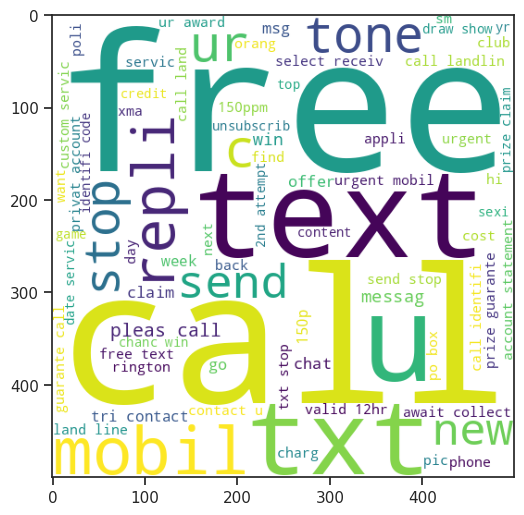

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [ ]:
ham_wc = wc.generate(df[df['Target']==0]['text_transform'].str.cat(sep=" "))    ## wordcould for ham msg

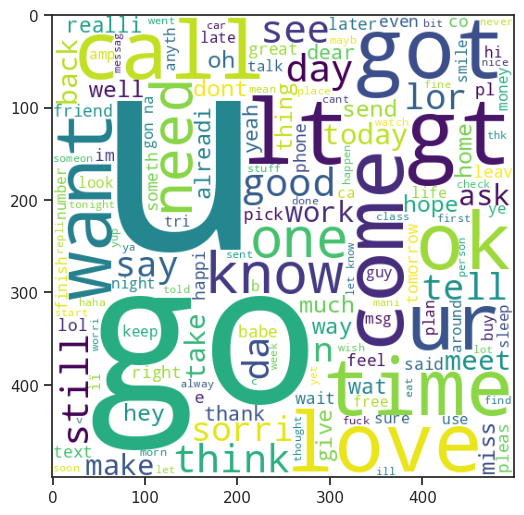

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# finding top 30 spam msg

spam_corpus = []
for msg in df[df['Target']==1]['text_transform'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

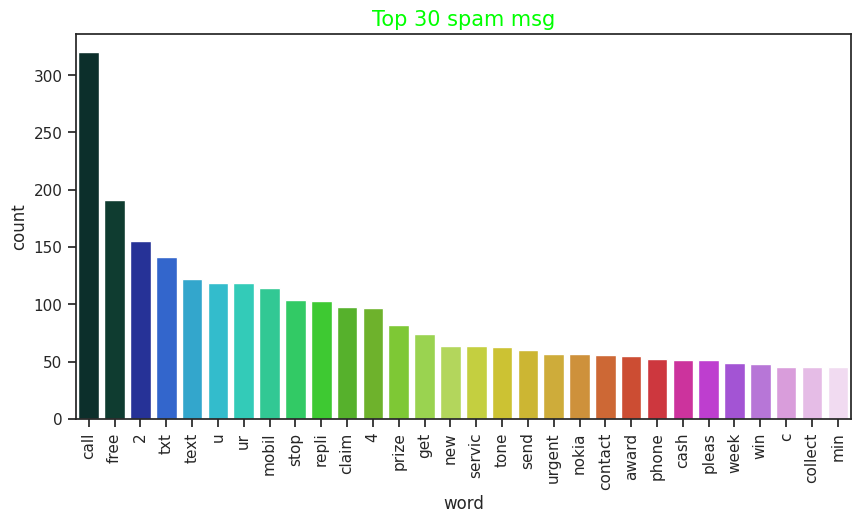

In [ ]:
from collections import Counter

plt.figure(figsize=(10,5))
common_word = Counter(spam_corpus).most_common(30)
df1 = pd.DataFrame(common_word, columns=['word','count'])

#Plot using keyword arguments
sns.barplot(x='word', y='count', data=df1, palette='gist_ncar', saturation=0.6)
plt.title("Top 30 spam msg", c='lime',size=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# finding top 30 ham msg

ham_corpus = []
for msg in df[df['Target']==0]['text_transform'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [1]:
len(ham_corpus)

NameError: name 'ham_corpus' is not defined

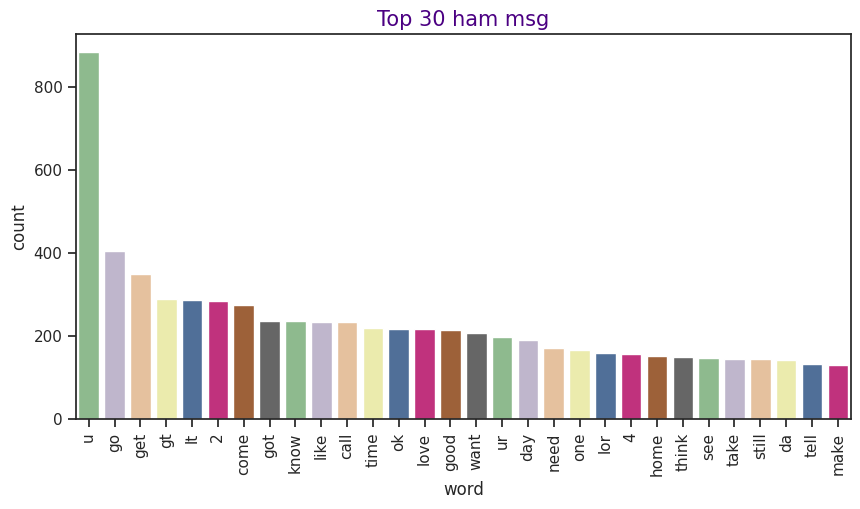

In [ ]:
plt.figure(figsize=(10,5))
common_word = Counter(ham_corpus).most_common(30)
df1 = pd.DataFrame(common_word, columns=['word','count'])

#Plot using keyword arguments
sns.barplot(x='word', y='count', data=df1, palette='Accent', saturation=0.6)
plt.title("Top 30 ham msg", c='indigo',size=15)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

Bag-of-words (BoW)


In [ ]:
# In (NLP), the bag-of-words (BoW) model is a method for representing text data as numerical vectors.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   # Ek bar pure model ko CountVectorizer se model perform karenge fir Ek bar TfidfVectorizer se model perform karenge jisme achha perform karega use use karenge
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df['text_transform']).toarray()  # Input


In [ ]:
y = df['Target'].values   # Output

train_test_split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


* >Naive Bayes

In [ ]:
# We use Naive_Bayes because it is very perfect for categorical(character) type data

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
# GaussianNB
model_gNB = GaussianNB()
model_gNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_gNB = model_gNB.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_gNB))
print(confusion_matrix(y_test, y_pred_gNB))
print(precision_score(y_test, y_pred_gNB))      # text data me accuracy_score & precision_score dono sabse bdiya rehna chahiye


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [ ]:
# MultinomialNB
model_mNB = MultinomialNB()
model_mNB.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred_mNB = model_mNB.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_mNB))
print(confusion_matrix(y_test, y_pred_mNB))
print(precision_score(y_test, y_pred_mNB))     # text data me accuracy_score & precision_score dono sabse bdiya rehna chahiye

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
# BernoulliNB
model_bNB = BernoulliNB()
model_bNB.fit(x_train, y_train)

BernoulliNB()

In [ ]:
y_pred_bNB = model_bNB.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_bNB))
print(confusion_matrix(y_test, y_pred_bNB))
print(precision_score(y_test, y_pred_bNB))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


 **TfidfVectorizer** ->**MultinomialNB** model ==> Accuracy_score =0.9593810444874274,  Confusion_matrix =[[896   0]
 [ 42  96]],  Precision_score = 1.0

* >Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9545454545454546
[[894   2]
 [ 45  93]]
0.9789473684210527


* >K-Nearst Neighbar

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_Knn = KNeighborsClassifier(n_neighbors=5)
model_Knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_Knn = model_Knn.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_Knn))
print(confusion_matrix(y_test, y_pred_Knn))
print(precision_score(y_test, y_pred_Knn))

0.9052224371373307
[[896   0]
 [ 98  40]]
1.0


* >Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_Dt = DecisionTreeClassifier(random_state=2)
model_Dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [ ]:
y_pred_Dt = model_Dt.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_Dt))
print(confusion_matrix(y_test, y_pred_Dt))
print(precision_score(y_test, y_pred_Dt))

0.9448742746615088
[[865  31]
 [ 26 112]]
0.7832167832167832


* > Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC(kernel='sigmoid', gamma=1.0)
model_svm.fit(x_train, y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [ ]:
y_pred_svm = model_svm.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))

0.9758220502901354
[[893   3]
 [ 22 116]]
0.9747899159663865


In [ ]:
clfs ={
    'MultinomialNB' : model_mNB,
    'LogisticRegression' : model,
    'KNeighborsClassifier' : model_Knn,
    'DecisionTreeClassifier' : model_Dt,
    'SVC' : model_svm
}

In [ ]:
accuracy_score1 = []
precision_score2 = []

for name, model in clfs.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy_score1.append(accuracy_score(y_test, y_pred))
    precision_score2.append(precision_score(y_test, y_pred))

In [ ]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_score': accuracy_score1,
    'Precision_score': precision_score2
}).sort_values('Precision_score', ascending = False)

performance_df

,Algorithm,Accuracy_score,Precision_score
0,MultinomialNB,0.970986,1.000000
2,KNeighborsClassifier,0.905222,1.000000
1,LogisticRegression,0.954545,0.978947
4,SVC,0.975822,0.974790
3,DecisionTreeClassifier,0.944874,0.783217


***Conclusion*** - Now the best model is **Naive Bayes(MultinomialNB)**

#5. Creating the GUI



In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))      # jo 'vectorizer.pkl' h eska nam ham kuch bhi rakh sakte h
pickle.dump(model_mNB,open('model.pkl','wb'))



In [ ]:
!pip install streamlit

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

### yha se uper vala function copy kiye h ##
# Data Preprocessing
def text_transform(x):
  x = x.lower()          #Lowercase
  x = nltk.word_tokenize(x)       #Tokenization

  y = []
  for i in x:         #Removing special characters
    if i.isalnum():
      y.append(i)

  x = y[:]
  y.clear()

  for i in x:
    if i not in stopwords.words('english') and i not in string.punctuation:       # Removing stop words and production
      y.append(i)

  x = y[:]
  y.clear()

  for i in x:
    y.append(ps.stem(i))       #Stemming


  return " ".join(y)

###yha tak uper vala function copy kiye!##


model = pickle.load(open('model.pkl','rb'))
vectorizer = pickle.load(open('vectorizer.pkl','rb'))

st.title("Email/SMS Spam Classifier")

input_sms = st.text_area("Enter your message")


#Predict button for my project

if st.button("Predict"):

    transformed_sms = text_transform(input_sms)  # Preprocessing
    vector_input = vectorizer.transform([transformed_sms])  # Vectorize
    prediction = model.predict(vector_input)  # Predict

    if prediction[0] == 1:
        st.error("🔴 SPAM")
    else:
        st.success("🟢 NOT SPAM")


# slider with instructions
st.sidebar.markdown("## SMS")
st.sidebar.info("This is for spam classifier project created by manas tripathi.")


Overwriting app.py


# Deploying APP

In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
changed 22 packages in 3s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [ ]:
# public ip password to the localtunnel
!curl ipv4.icanhazip.com

34.63.245.81


In [ ]:
!streamlit run app.py &>./logs.txt & npx localtunnel --port 8501

⠙⠹⠸your url is: https://sour-bees-visit.loca.lt
/content/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:28833 (check your firewall settings)
    at Socket.<anonymous> (/content/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙

# Finish Project